# Find neighbor words

In [2]:
import gensim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.metrics import accuracy_score

In [3]:
model = gensim.models.KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [4]:
# most similar only uses cosine similarity, therfore not totally perfect as wanted in the assignment
print('King:')
print(pd.DataFrame(model.similar_by_word('King', topn=5)))
print('London:')
print(pd.DataFrame(model.similar_by_word('London', topn=5)))
print('Good:')
print(pd.DataFrame(model.similar_by_word('Good', topn=5)))
print('Apple:')
print(pd.DataFrame(model.similar_by_word('Apple', topn=5)))

King:
                      0         1
0               Jackson  0.532635
1                Prince  0.530633
2              Tupou_V.  0.529283
3                  KIng  0.522750
4  e_mail_robert.king_@  0.517362
London:
                                  0         1
0  EURASIAN_NATURAL_RESOURCES_CORP.  0.673970
1                           Londons  0.653613
2              Islamabad_Slyvia_Hui  0.637556
3                        Wandsworth  0.613382
4                      Canary_Wharf  0.611928
Good:
                            0         1
0                         Bad  0.617220
1                        good  0.558616
2                      Decent  0.516819
3                      Better  0.503792
4  LAKE_WYLIE_Largemouth_Bass  0.500470
Apple:
                   0         1
0         Apple_AAPL  0.745699
1  Apple_Nasdaq_AAPL  0.730041
2  Apple_NASDAQ_AAPL  0.717509
3     Apple_Computer  0.714597
4             iPhone  0.692427


In [5]:
def euclidean_distance(v1,v2):
    return distance.euclidean(v1,v2)

distances = []
for vector in model.vectors:
    distances.append({'word': vector, 
                      'king_score' : euclidean_distance(model['King'],vector),
                      'london_score' : euclidean_distance(model['London'],vector),
                      'good_score' : euclidean_distance(model['Good'],vector),
                      'apple_score' : euclidean_distance(model['Apple'],vector)
                     })

In [6]:
scores = ['king_score','london_score','good_score','apple_score']
titles = ['King:','London:','Good:','Apple:']
count = 0
for score in scores:
    london_words = sorted(distances, key=lambda k: k[score])
    print(titles[count])
    count += 1
    #skip the first word sicne will be the same
    for scores in london_words[1:6]:
        [(word,_)] = model.most_similar(positive=[scores.get('word')],topn=1)
        print(word, scores.get(score))

King:
Tupou_V. 1.9726125001907349
e_mail_robert.king_@ 2.014012098312378
Singer_songwriter_Carole 2.0307531356811523
Geoffrey_Rush_Exit 2.0331478118896484
KIng 2.0411529541015625
London:
EURASIAN_NATURAL_RESOURCES_CORP. 2.0974204540252686
Sarah_Hills_FoodBizDaily.com 2.166471242904663
o2_arena 2.191667079925537
Cricklewood_north 2.198361396789551
Canary_Warf 2.202068567276001
Good:
good 2.4779608249664307
LAKE_WYLIE_Largemouth_Bass 2.5142698287963867
Reprint_Practices 2.567570209503174
Harm_Than 2.5735108852386475
LAKE_HARTWELL_Largemouth_Bass 2.586975336074829
Apple:
Apple_Nasdaq_AAPL 2.404542922973633
AAPL_PriceWatch_Alert 2.4422295093536377
Apple_AAPL 2.4825079441070557
RIM_NSDQ_RIMM 2.5051934719085693
NASDAQ_AAPL_iPhone 2.5330886840820312


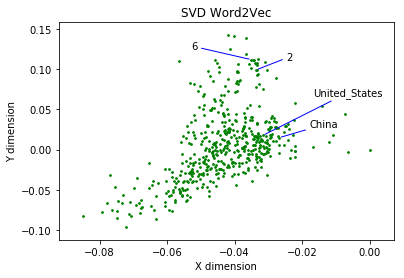

In [10]:
fig = plt.gcf()
arrowprops=dict(arrowstyle='-', color='blue')
textcoords="offset points"

U, s, Vh = np.linalg.svd(model.vectors[:500], full_matrices = False)
V = U.T
plt.scatter(V[0], V[1], c='green', s = 3)
plt.title("SVD Word2Vec")
# numbers
# reduced the dimensions to 2
plt.xlabel('X dimension')
plt.ylabel('Y dimension')
plt.annotate(model.index2word[381], xy=(V[0,381], V[1,381]),xytext=(-60,10),textcoords=textcoords,arrowprops=arrowprops)
plt.annotate(model.index2word[200], xy=(V[0,200], V[1,200]),xytext=(30,10),textcoords=textcoords,arrowprops=arrowprops)
# Countries
plt.annotate(model.index2word[367], xy=(V[0,367], V[1,367]),xytext=(30,10),textcoords=textcoords,arrowprops=arrowprops)
plt.annotate(model.index2word[409], xy=(V[0,409], V[1,409]),xytext=(50,40),textcoords=textcoords,arrowprops=arrowprops)
plt.show()
fig.savefig('svd_plot.png',dpi=300)

# Main Task

In [7]:
with open('data/questions-words.txt') as f:
    content = f.readlines()

In [8]:
# Example subtract
model.most_similar(positive=['Baghdad', 'Greece'], negative=['Athens'])

[('Iraqi', 0.6351870894432068),
 ('Mosul', 0.6185438632965088),
 ('Iraq', 0.604138195514679),
 ('Sunni_Arab', 0.5862730145454407),
 ('Iraqis', 0.5799270868301392),
 ('Anbar', 0.5743235349655151),
 ('Samarra', 0.5673612356185913),
 ('Shiite', 0.5598145723342896),
 ('Diyala_province', 0.5576438307762146),
 ('Kirkuk', 0.5559762716293335)]

In [9]:
# Read text file, remove last item
expected_syn = []
predict_syn = []
expected_sem = []
predict_sem = []
syntax = False
semantics = False
for line in content:
    splited_line = line.rstrip().split(' ')
    predict_line = line.rstrip().split(' ')[:-1]
    if (line.startswith( ': gram' ) or syntax == True):
        syntax = True
        semantics = False
        if not line.startswith( ':' ):
            expected_syn.append(splited_line)
            predict_syn.append(predict_line)
    elif (line.startswith( ':' ) or semantics == True):
        semantics = True
        syntax = False
        if not line.startswith( ':' ):
            expected_sem.append(splited_line)
            predict_sem.append(predict_line)

print(len(expected_syn))
print(len(predict_syn))
print(len(expected_sem))
print(len(predict_sem))

10675
10675
8869
8869


In [10]:
def get_labels(predicted, expected):
    labels = np.zeros(len(predicted))
    for index in range(len(predicted)):
        first_word = predicted[index][0]
        second_word = predicted[index][1]
        third_word = predicted[index][2]
        # Calulcate the 4th word by taking third, second word positive and first negative
        [(word, similarity)] = model.most_similar(positive=[third_word, second_word], negative=[first_word],topn=1)
        # if line already has been predicted append otherwise skip
        if len(predicted[index]) < 4:
            predicted[index].append(word.rstrip())
        # To see at least the progress of the process
        if index % 1000 == 0:
            print("Amount of processed:",index)
        # if the prediction is equal to what we exepect set label to 1 otherwise 0
        if predicted[index] == expected[index]:
            labels[index]= 1
        else:
            labels[index]= 0
    return labels

In [11]:
labels_syn = get_labels(predict_syn,expected_syn)

Amount of processed: 0
Amount of processed: 1000
Amount of processed: 2000
Amount of processed: 3000
Amount of processed: 4000
Amount of processed: 5000
Amount of processed: 6000
Amount of processed: 7000
Amount of processed: 8000
Amount of processed: 9000
Amount of processed: 10000


In [12]:
labels_sem = get_labels(predict_sem,expected_sem)

Amount of processed: 0
Amount of processed: 1000
Amount of processed: 2000
Amount of processed: 3000
Amount of processed: 4000
Amount of processed: 5000
Amount of processed: 6000
Amount of processed: 7000
Amount of processed: 8000


In [13]:
# Accuracy Syntax
accuracy_score(np.ones(len(expected_syn)),labels_syn)

0.7400468384074942

In [14]:
# Accuracy Semantics
accuracy_score(np.ones(len(expected_sem)),labels_sem)

0.7308602999210734

In [15]:
# Overall accuracy
all_labels = np.ones(len(expected_syn) + len(expected_sem))
accuracy_score(all_labels,np.append(labels_syn,labels_sem))

0.7358780188293083